
**OLS MODEL - MARKET RISK (APPLE Inc.)**

A statistical model (OLS model) has been designed to predict the value of Apple Inc. (AAPL) stock, which will be used as the dependent variable.

The Nasdaq-100, USD Index, and 10-Year Treasury Yield indicators have been chosen as independent variables because they are economically significant for the performance of a stock like AAPL and also because, due to their nature, they have a low risk of multicollinearity.


- NASDAQ-100 Index:
Represents the 100 largest technology companies on the Nasdaq.

- USD Index:
Measures the strength of the dollar against a basket of foreign currencies.

- 10-Year Treasury Yield:
Reflects market expectations about growth and inflation.

**We will clean and preprocess the data, and finally, we will draw conclusions based on the results of the OLS and other quantitative methods used.**

In [4]:
# Data for these indicators have been extracted from the Yahoo Finance website using the Python 'yfinance' library.

In [5]:
import yfinance as yf
import pandas as pd

# Defining the ticker for Apple Inc (based on Yahoo Finance)
ticker = "AAPL"

# Extracting Apple data from 2024-01-01 to 2025-03-31
data_apple = yf.download(ticker, start="2024-01-01", end="2025-03-31", progress=False)

# Extracting only 'Open' and 'Close' and 'Date' columns.
data_apple = data_apple[['Open', 'Close']]

# Reseting index in order to have 'Date' as a column.
data_apple.reset_index(inplace=True)

# Showing the first part of the dataframe.
print(data_apple.head())

# Saving the data as a CSV file (in case we need it in the future)
data_apple.to_csv("apple_data_1.csv", index=False)

Price        Date        Open       Close
Ticker                   AAPL        AAPL
0      2024-01-02  186.033072  184.532089
1      2024-01-03  183.120556  183.150375
2      2024-01-04  181.062914  180.824356
3      2024-01-05  180.903872  180.098694
4      2024-01-08  181.003268  184.452560


In [7]:
# Data preprocessing, exploration and cleaning.

In [8]:
# Dataframe size

data_apple.shape

(311, 3)

In [9]:
data_apple.tail(10)

Price,Date,Open,Close
Ticker,,AAPL,AAPL
301,2025-03-17,213.309998,214.000000
302,2025-03-18,214.160004,212.690002
303,2025-03-19,214.220001,215.240005
304,2025-03-20,213.990005,214.100006
305,2025-03-21,211.559998,218.270004
306,2025-03-24,221.000000,220.729996
307,2025-03-25,220.770004,223.750000
308,2025-03-26,223.509995,221.529999
309,2025-03-27,221.389999,223.850006


In [10]:
data_apple.columns.names

FrozenList(['Price', 'Ticker'])

In [11]:
data_apple.columns

MultiIndex([( 'Date',     ''),
            ( 'Open', 'AAPL'),
            ('Close', 'AAPL')],
           names=['Price', 'Ticker'])

In [12]:
data_apple.head(10)

Price,Date,Open,Close
Ticker,,AAPL,AAPL
0,2024-01-02,186.033072,184.532089
1,2024-01-03,183.120556,183.150375
2,2024-01-04,181.062914,180.824356
3,2024-01-05,180.903872,180.098694
4,2024-01-08,181.003268,184.452560
5,2024-01-09,182.822345,184.035065
6,2024-01-10,183.249796,185.078812
7,2024-01-11,185.426703,184.482376
8,2024-01-12,184.949573,184.810410


In [14]:
data_apple = data_apple.rename(columns={'Close': 'Price'})

In [15]:
data_apple.head(10)

Price,Date,Open,Price
Ticker,,AAPL,AAPL
0,2024-01-02,186.033072,184.532089
1,2024-01-03,183.120556,183.150375
2,2024-01-04,181.062914,180.824356
3,2024-01-05,180.903872,180.098694
4,2024-01-08,181.003268,184.452560
5,2024-01-09,182.822345,184.035065
6,2024-01-10,183.249796,185.078812
7,2024-01-11,185.426703,184.482376
8,2024-01-12,184.949573,184.810410


In [16]:
data_apple = data_apple.drop(columns=['Open'])

In [17]:
data_apple.head(10)

Price,Date,Price
Ticker,,AAPL
0,2024-01-02,184.532089
1,2024-01-03,183.150375
2,2024-01-04,180.824356
3,2024-01-05,180.098694
4,2024-01-08,184.452560
5,2024-01-09,184.035065
6,2024-01-10,185.078812
7,2024-01-11,184.482376
8,2024-01-12,184.810410


In [18]:
# Extracting historical data for Nasdaq index. Yahoo Finance Ticker: ^NDX

In [19]:
import yfinance as yf
import pandas as pd


ticker = "^NDX"


data_nasdaq = yf.download(ticker, start="2024-01-01", end="2025-03-31", progress=False)


data_nasdaq = data_nasdaq[['Close']]


data_nasdaq.reset_index(inplace=True)


print(data_nasdaq.head())

data_nasdaq.to_csv("data_nasdaq.csv", index=False)

Price        Date         Close
Ticker                     ^NDX
0      2024-01-02  16543.939453
1      2024-01-03  16368.490234
2      2024-01-04  16282.009766
3      2024-01-05  16305.980469
4      2024-01-08  16649.869141


In [20]:
# Data preprocessing, exploration and cleaning.

In [21]:
data_nasdaq.shape

(311, 2)

In [22]:
data_nasdaq.columns

MultiIndex([( 'Date',     ''),
            ('Close', '^NDX')],
           names=['Price', 'Ticker'])

In [23]:
data_nasdaq.tail(10)

Price,Date,Close
Ticker,,^NDX
301,2025-03-17,19812.240234
302,2025-03-18,19483.359375
303,2025-03-19,19736.660156
304,2025-03-20,19677.609375
305,2025-03-21,19753.970703
306,2025-03-24,20180.449219
307,2025-03-25,20287.830078
308,2025-03-26,19916.990234
309,2025-03-27,19798.619141


In [24]:
data_nasdaq = data_nasdaq.rename(columns={'Close': 'Nasdaq'})

In [25]:
data_nasdaq.columns

MultiIndex([(  'Date',     ''),
            ('Nasdaq', '^NDX')],
           names=['Price', 'Ticker'])

In [26]:
# Before merging, check if the dates of both data frames match.

In [27]:

dates_data_apple = data_apple[~data_apple['Date'].isin(data_nasdaq['Date'])]

In [28]:

dates_data_nasdaq = data_nasdaq[~data_nasdaq['Date'].isin(data_apple['Date'])]

In [29]:

diff_dates = pd.concat([data_apple['Date'], data_nasdaq['Date']]).drop_duplicates(keep=False)

In [30]:
diff_dates

,Date


In [31]:
diff_dates.shape

(0,)

In [32]:
# It has been verified that the dates in the data_apple and data_nasdaq dataframes match exactly, so we can add our 'Nasdaq' column to the initial data_apple dataframe.

In [33]:
data_apple['Nasdaq'] = data_nasdaq['Nasdaq']

In [34]:
data_nasdaq.shape

(311, 2)

In [35]:
data_apple.head(10)

Price,Date,Price,Nasdaq
Ticker,,AAPL,
0,2024-01-02,184.532089,16543.939453
1,2024-01-03,183.150375,16368.490234
2,2024-01-04,180.824356,16282.009766
3,2024-01-05,180.098694,16305.980469
4,2024-01-08,184.452560,16649.869141
5,2024-01-09,184.035065,16678.699219
6,2024-01-10,185.078812,16793.050781
7,2024-01-11,184.482376,16820.900391
8,2024-01-12,184.810410,16832.919922


In [36]:
data_apple.tail(10)

Price,Date,Price,Nasdaq
Ticker,,AAPL,
301,2025-03-17,214.000000,19812.240234
302,2025-03-18,212.690002,19483.359375
303,2025-03-19,215.240005,19736.660156
304,2025-03-20,214.100006,19677.609375
305,2025-03-21,218.270004,19753.970703
306,2025-03-24,220.729996,20180.449219
307,2025-03-25,223.750000,20287.830078
308,2025-03-26,221.529999,19916.990234
309,2025-03-27,223.850006,19798.619141


In [37]:
data_apple.shape

(311, 3)

In [38]:
data_apple = data_apple.rename(columns={'Price': 'Price_apple'})

In [39]:
print(data_apple.dtypes)

Price        Ticker
Date                   datetime64[ns]
Price_apple  AAPL             float64
Nasdaq                        float64
dtype: object


In [40]:
# Extracting historical data for USD index. Yahoo Finance Ticker: DX-Y.NYB

In [41]:
import yfinance as yf
import pandas as pd


ticker = "DX-Y.NYB"


data_usd_index = yf.download(ticker, start="2024-01-01", end="2025-03-31", progress=False)


data_usd_index = data_usd_index[['Close']]


data_usd_index.reset_index(inplace=True)


print(data_usd_index.head())


data_usd_index.to_csv("data_usd_index.csv", index=False)

Price        Date       Close
Ticker               DX-Y.NYB
0      2024-01-02  102.199997
1      2024-01-03  102.459999
2      2024-01-04  102.419998
3      2024-01-05  102.410004
4      2024-01-08  102.209999


In [42]:
# Data preprocessing, exploration and cleaning.

In [43]:
data_usd_index = data_usd_index.rename(columns={'Close': 'USD_index'})

In [44]:
data_usd_index.shape

(312, 2)

In [45]:
data_usd_index.head(20)

Price,Date,USD_index
Ticker,,DX-Y.NYB
0,2024-01-02,102.199997
1,2024-01-03,102.459999
2,2024-01-04,102.419998
3,2024-01-05,102.410004
4,2024-01-08,102.209999
5,2024-01-09,102.570000
6,2024-01-10,102.360001
7,2024-01-11,102.290001
8,2024-01-12,102.400002


In [46]:
# The previous dataframes (Apple and Nasdaq) have been joined without problems because they have the same number of observations (311) and it has also been verified that their dates match.
# It was found that the data_usd_index dataframe has 311 observations. This leads us to infer that we have an additional date or row.
# We proceed to join the two dataframes using the merge function, so that it only includes rows with dates that match in both dataframes.

In [47]:
data_apple = pd.merge(data_apple, data_usd_index, on='Date')

In [48]:
data_apple.columns

MultiIndex([(       'Date',         ''),
            ('Price_apple',     'AAPL'),
            (     'Nasdaq',         ''),
            (  'USD_index', 'DX-Y.NYB')],
           names=['Price', 'Ticker'])

In [49]:
data_apple.shape

(311, 4)

In [50]:
data_apple.head(10)

Price,Date,Price_apple,Nasdaq,USD_index
Ticker,,AAPL,,DX-Y.NYB
0,2024-01-02,184.532089,16543.939453,102.199997
1,2024-01-03,183.150375,16368.490234,102.459999
2,2024-01-04,180.824356,16282.009766,102.419998
3,2024-01-05,180.098694,16305.980469,102.410004
4,2024-01-08,184.452560,16649.869141,102.209999
5,2024-01-09,184.035065,16678.699219,102.570000
6,2024-01-10,185.078812,16793.050781,102.360001
7,2024-01-11,184.482376,16820.900391,102.290001
8,2024-01-12,184.810410,16832.919922,102.400002


In [51]:
# Extracting historical data for 10-Year Treasury Yield. Yahoo Finance Ticker: ^TNX.

In [52]:
import yfinance as yf
import pandas as pd


ticker = "^TNX"


tenyear_treasury_yield = yf.download(ticker, start="2024-01-01", end="2025-03-31", progress=False)


tenyear_treasury_yield = tenyear_treasury_yield[['Close']]


tenyear_treasury_yield.reset_index(inplace=True)


print(tenyear_treasury_yield.head())


tenyear_treasury_yield.to_csv("10_year_treasury_yield.csv", index=False)

Price        Date  Close
Ticker              ^TNX
0      2024-01-02  3.946
1      2024-01-03  3.907
2      2024-01-04  3.991
3      2024-01-05  4.042
4      2024-01-08  4.002


In [53]:
# Data preprocessing, exploration and cleaning.

In [54]:
tenyear_treasury_yield.shape

(311, 2)

In [55]:
tenyear_treasury_yield = tenyear_treasury_yield.rename(columns={'Close': '10y_Treasury_Yield'})

In [56]:
tenyear_treasury_yield.columns

MultiIndex([(              'Date',     ''),
            ('10y_Treasury_Yield', '^TNX')],
           names=['Price', 'Ticker'])

In [57]:
tenyear_treasury_yield.head(10)

Price,Date,10y_Treasury_Yield
Ticker,,^TNX
0,2024-01-02,3.946
1,2024-01-03,3.907
2,2024-01-04,3.991
3,2024-01-05,4.042
4,2024-01-08,4.002
5,2024-01-09,4.019
6,2024-01-10,4.030
7,2024-01-11,3.977
8,2024-01-12,3.950


In [60]:
# Proceed to join the two dataframes using the merge function, so that it only includes rows with dates that match in both dataframes.

In [58]:
data_apple = pd.merge(data_apple, tenyear_treasury_yield, on='Date')

<ipython-input-58-c1e42a3ea436>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_apple = pd.merge(data_apple, tenyear_treasury_yield, on='Date')


In [59]:
data_apple.head(10)

Price,Date,Price_apple,Nasdaq,USD_index,10y_Treasury_Yield
Ticker,,AAPL,,DX-Y.NYB,^TNX
0,2024-01-02,184.532089,16543.939453,102.199997,3.946
1,2024-01-03,183.150375,16368.490234,102.459999,3.907
2,2024-01-04,180.824356,16282.009766,102.419998,3.991
3,2024-01-05,180.098694,16305.980469,102.410004,4.042
4,2024-01-08,184.452560,16649.869141,102.209999,4.002
5,2024-01-09,184.035065,16678.699219,102.570000,4.019
6,2024-01-10,185.078812,16793.050781,102.360001,4.030
7,2024-01-11,184.482376,16820.900391,102.290001,3.977
8,2024-01-12,184.810410,16832.919922,102.400002,3.950


In [ ]:
# In the dataframe header, we've noticed that there are two levels of variable names. We'll clean up this data to make the dataframe look more organized.

In [63]:
# Check dataframe column levels

In [62]:
print(data_apple.index.nlevels)  # debe ser 1
print(data_apple.columns)

1
MultiIndex([(              'Date',         ''),
            (       'Price_apple',     'AAPL'),
            (            'Nasdaq',         ''),
            (         'USD_index', 'DX-Y.NYB'),
            ('10y_Treasury_Yield',     '^TNX')],
           names=['Price', 'Ticker'])


In [64]:
# To make our dataframe look better organized, we are going to flatten the column names leaving a single level.

In [65]:
# Flatten multi-level column names to a single layer
data_apple.columns = ['_'.join([str(a) for a in col if a]) for col in data_apple.columns.values]

In [66]:
print(data_apple.columns)

Index(['Date', 'Price_apple_AAPL', 'Nasdaq', 'USD_index_DX-Y.NYB',
       '10y_Treasury_Yield_^TNX'],
      dtype='object')


In [67]:
data_apple.columns

Index(['Date', 'Price_apple_AAPL', 'Nasdaq', 'USD_index_DX-Y.NYB',
       '10y_Treasury_Yield_^TNX'],
      dtype='object')

In [70]:
# Check if it has a single level now.

In [68]:
data_apple.head()

,Date,Price_apple_AAPL,Nasdaq,USD_index_DX-Y.NYB,10y_Treasury_Yield_^TNX
0,2024-01-02,184.532089,16543.939453,102.199997,3.946
1,2024-01-03,183.150375,16368.490234,102.459999,3.907
2,2024-01-04,180.824356,16282.009766,102.419998,3.991
3,2024-01-05,180.098694,16305.980469,102.410004,4.042
4,2024-01-08,184.452560,16649.869141,102.209999,4.002


In [69]:
data_apple.shape

(311, 5)

In [71]:
# Before we run our calculations using OLS, let's look at the correlation coefficients of the variables in data_apple.

In [72]:
# Correlación Matrix
corr_matrix = data_apple.corr('pearson')

In [73]:
corr_matrix

,Date,Price_apple_AAPL,Nasdaq,USD_index_DX-Y.NYB,10y_Treasury_Yield_^TNX
Date,1.000000,0.843553,0.872415,0.401602,0.180754
Price_apple_AAPL,0.843553,1.000000,0.889301,0.289000,-0.046982
Nasdaq,0.872415,0.889301,1.000000,0.521009,0.245856
USD_index_DX-Y.NYB,0.401602,0.289000,0.521009,1.000000,0.855424
10y_Treasury_Yield_^TNX,0.180754,-0.046982,0.245856,0.855424,1.000000


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

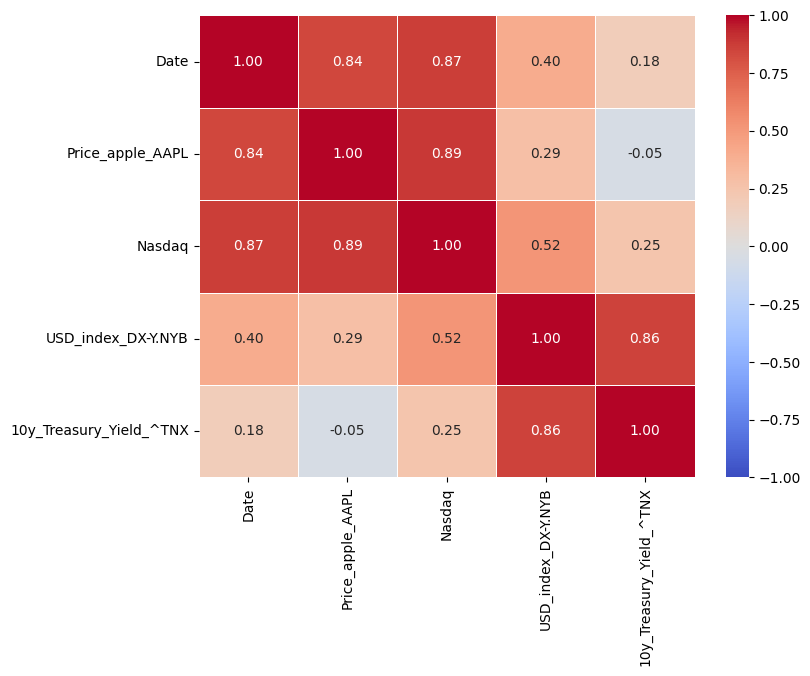

In [77]:
# Heat map (Seaborn and matplotlib libraries)
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

In [85]:
# To calculate OLS, we will use statsmodels and sklearn libraries.

In [86]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [88]:
# Independient variables.
X = data_apple[['Nasdaq', 'USD_index_DX-Y.NYB', '10y_Treasury_Yield_^TNX']]

In [89]:
# Adding a Constante (intercept)
X = sm.add_constant(X)

In [90]:
# Dependent variable (Apple price)
y = data_apple['Price_apple_AAPL']

In [91]:
# Splitting the data - training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [92]:
# OLS model
model = sm.OLS(y_train, X_train).fit()

In [93]:
# Test dataset predictions.
y_pred = model.predict(X_test)

In [94]:
# Print results.
print("Resumen del modelo OLS:\n", model.summary())
print("\nMétricas de validación:")

Resumen del modelo OLS:
                             OLS Regression Results                            
Dep. Variable:       Price_apple_AAPL   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     520.5
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          1.05e-105
Time:                        17:56:00   Log-Likelihood:                -905.38
No. Observations:                 248   AIC:                             1819.
Df Residuals:                     244   BIC:                             1833.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
c

In [95]:
data_apple.to_excel("data_apple_market_risk_copy.xlsx")

In [98]:
# Calcutate VIF

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [99]:

X = data_apple[['Nasdaq', 'USD_index_DX-Y.NYB', '10y_Treasury_Yield_^TNX']].dropna()

In [100]:

X_const = add_constant(X)

In [101]:

VIF = pd.DataFrame()
VIF["Variable"] = X_const.columns
VIF["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

In [109]:
VIF

,Variable,VIF
0,const,7144.808670
1,Nasdaq,1.725055
2,USD_index_DX-Y.NYB,6.042084
3,10y_Treasury_Yield_^TNX,4.685154


# VIF ANALYSIS



*  **Nasdaq = 1.73 ->** Very low, NO collinearity.
*   **USD_index_DX-Y.NYB =	6.04 ->** Acceptable, although it may have some correlation with other variables.
*   **10y_Treasury_Yield_^TNX:	4.69 ->** Acceptable. Below the problematic threshold.


• All variables have VIF < 10, which is a good standard.

• Nasdaq is an excellent variable to explain AAPL (it makes sense given its correlation with tech stocks).

• The USD Index and 10-Year Treasury Yield are significant macroeconomic variables, but their VIF indicates that they are not strongly correlated with each other.

**Model Evaluation**


R-squared 0.865: Explains 86.5% of the variance in AAPL's price. Excellent.

Adj. R-squared 0.863: Adjusted for the number of variables. Almost the same as

R²: you're not overfitting.

F-statistic: 520.5 Very high -> the model as a whole is highly significant.

Prob (F-statistic): 1.05e-105 Extremely low -> the model is statistically significant.

Durbin-Watson: 2.102 Very close to 2 -> there is no autocorrelation in the errors.


**Coefficients**

Nasdaq +0.016 / p=0.000 High significance. For every additional point in the Nasdaq, AAPL rises $0.016.

USD Index (DX-Y.NYB) +2.256 / p=0.001: The strong USD is positively correlated with AAPL in this model.

10Y Treasury Yield -42.96 / p=0.000: Highly significant. AAPL falls ~$43 for every additional point in the bond yield.

**CONCLUSIONS**

All p-values ​​are < 0.01, indicating high statistical significance for each individual predictor.

It has a low VIF (no serious multicollinearity).

Very high explanatory power (R² = 0.865).

Highly significant variables.

No autocorrelation of errors.

Interpretable and useful for prediction.

In [104]:
# Graph the model

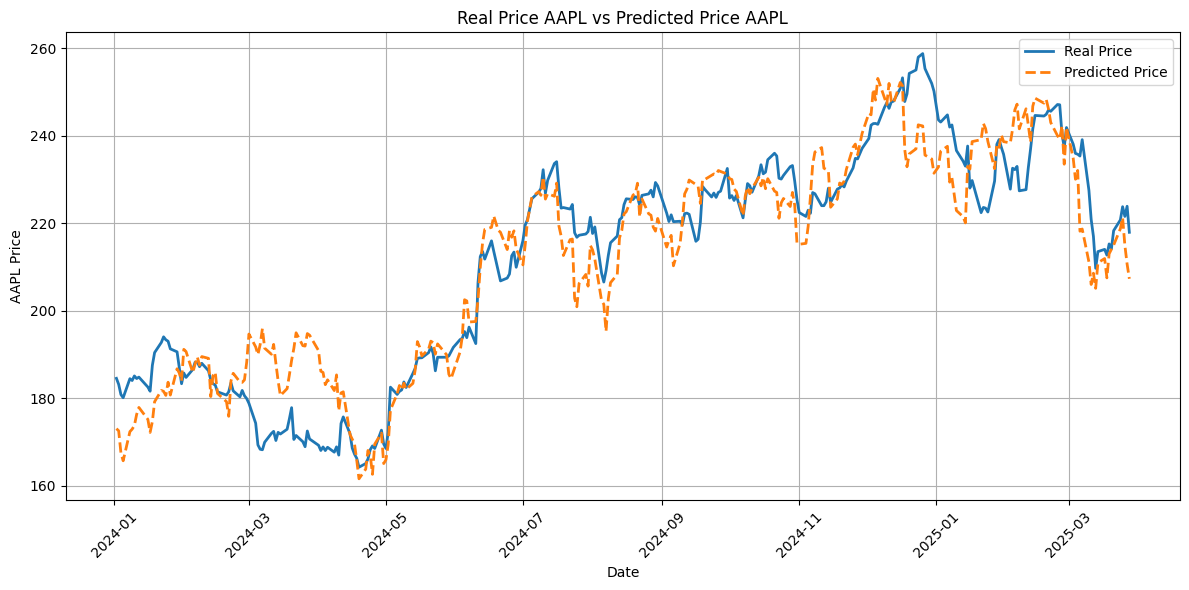

In [105]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


X = data_apple[['Nasdaq', 'USD_index_DX-Y.NYB', '10y_Treasury_Yield_^TNX']]
y = data_apple['Price_apple_AAPL']
X_const = sm.add_constant(X)

# OLS model
model = sm.OLS(y, X_const).fit()
data_apple['Predicted_Price'] = model.predict(X_const)

# Grapf
plt.figure(figsize=(12, 6))
plt.plot(data_apple['Date'], data_apple['Price_apple_AAPL'], label='Real Price', linewidth=2)
plt.plot(data_apple['Date'], data_apple['Predicted_Price'], label='Predicted Price', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('AAPL Price')
plt.title('Real Price AAPL vs Predicted Price AAPL')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**TEST SCENARIO**

According to Yahoo Finance, the closing price on April 1, 2025 was as follows:


*   10-year Treasury yield: 4.1560
*   USD Index: 104.26
*   Nasdaq: 19436.42



Let's make an Apple (AAPL) stock price prediction based on those values.

OLS RESULTS:

*   Intercept (const): -152.6896
*   Nasdaq coef: 0.0160
*   USD Index coef: 2.2560
*   10y Treasury Yield coef: -42.9632





In [108]:
# Apply linear regression model formula:


# Predicted Price = const + β1 x Nasdaq + β2 x USD Index + β3 x Treasury Yield


# Replacing:

# Predicted_Price_AAPL = −152.6896 + (0.0160×19436.42) + (2.2560×104.26) + (−42.9632×4.1560)


const = -152.6896
print("const:\n", const)
A = 0.0160*19436.42
print("β1 x Nasdaq:\n", A)
B = 2.2560*104.26
print("β2 x USD Index:\n", B)
C = -42.9632*4.1560
print("β3 x Treasury Yield:\n", C)


Predicted_Price = const + A + B + C

print("Predicted_Price:\n", Predicted_Price)

const:
 -152.6896
β1 x Nasdaq:
 310.98272
β2 x USD Index:
 235.21056
β3 x Treasury Yield:
 -178.5550592
Predicted_Price:
 214.94862079999993



**Conclusions:**

Apple actual closing price: 223.19
Model-predicted price: 214.90

**Absolute error:**

Absolute error = 223.19 - 214.90 = 8.29

**Percentage error:**

Error % = (8.29 / 223.19) x 100 ≈ 3.71%


The absolute error is $8.29, which may seem large depending on the context, but in relative terms, it represents an error of 3.71%.

In financial or asset pricing models, an error below 5% is generally considered reasonable, especially when modeling with macroeconomic variables that do not capture specific market events (such as earnings, announcements, or news).

If we want to reduce the percentage error, we could build a model that incorporates alternative data such as news volume and sentiment.
